**notebook version**: `3` (4 Jul 2024)  
**new in this version**: added check if downloaded data is indeed in 30MIN time resolution

- This notebook can be used to download data from the database `InfluxDB`
- Data are stored to a `.csv` file in this folder

Data from the datbase, but from the old bucket `CH-CHA_processing`.

# **Auto-settings**

## Data settings

In [1]:
DIRCONF = r'F:\Sync\luhk_work\20 - CODING\22 - POET\configs'
# DIRCONF = r'P:\Flux\RDS_calculations\_scripts\_configs\configs'  # Folder with configuration files: needed e.g. for connection to database
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)
REQUIRED_TIME_RESOLUTION = '30min'  # 30MIN time resolution

## Imports

In [2]:
import importlib.metadata
from datetime import datetime

%matplotlib inline
import seaborn as sns
from pathlib import Path
from diive.core.io.files import save_parquet

sns.set_theme('notebook')
from dbc_influxdb import dbcInflux
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")
version_dbc = importlib.metadata.version("dbc_influxdb")
print(f"dbc-influxdb version: v{version_dbc}")
dbc = dbcInflux(dirconf=DIRCONF)  # Connect to database

diive version: v0.87.0
dbc-influxdb version: v0.13.1
Reading configuration files was successful.
Connection to database works.


</br>

# **DOWNLOAD** screened data from the database

In [3]:
%%time
data_simple, data_detailed, assigned_measurements = dbc.download(
    bucket=f'ch-fru_processed',
    measurements=['G', 'TA', 'SW', 'PPFD', 'LW', 'RH', 'PA', 'SWC', 'TS', 'PREC', 'RH'],
    fields=[
        'G_GF1_0.03_1',
        'G_GF1_0.03_2',
        'G_GF1_0.03_3',
        'G_GF1_0.03_4',
        'G_GF1_0.06_1',
        'G_GF1_0.06_2',
        'LW_IN_T1_2_1',
        'LW_OUT_T1_2_1',
        'PPFD_IN_CORRECTED_T1_2_1',
        'PPFD_OUT_T1_2_1',
        'PREC_TOT_FIXED_M1_1_2',
        'PREC_TOT_M1_1_1',
        'RH_T1_2_1',
        'SW_IN_CORRECTED_T1_2_1',
        'SW_OUT_T1_2_1',
        'SWC_GF1_0.05_1',        
        'SWC_GF1_0.15_1',
        'SWC_GF1_0.1_2',
        'SWC_GF1_0.25_1',
        'SWC_GF1_0.2_2',
        'SWC_GF1_0.3_2',
        'SWC_GF1_0.4_1',
        'SWC_GF1_0.4_2',        
        'SWC_GF1_0.6_2',
        'SWC_GF1_0.75_1',
        'SWC_GF1_0.95_1',
        'SWC_GF1_1_2',
        'TA_T1_2_1',
        'TS_GF1_0.01_1',
        'TS_GF1_0.02_1',
        'TS_GF1_0.04_1',
        'TS_GF1_0.05_2',
        'TS_GF1_0.07_1',
        'TS_GF1_0.15_1',
        'TS_GF1_0.1_1',
        'TS_GF1_0.1_2',
        'TS_GF1_0.25_1',
        'TS_GF1_0.2_2',
        'TS_GF1_0.3_2',
        'TS_GF1_0.4_1',        
        'TS_GF1_0.5_2',
        'TS_GF1_0.95_1',
        'TS_GF1_1_2',        
    ],
    start='2005-01-01 00:00:01',  # Download data starting with this date (the start date itself IS included),
    stop='2021-01-01 00:00:01',  # Download data before this date (the stop date itself IS NOT included),
    timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
    data_version='meteoscreening_mst'
)


DOWNLOADING
    from bucket ch-fru_processed
    variables ['G_GF1_0.03_1', 'G_GF1_0.03_2', 'G_GF1_0.03_3', 'G_GF1_0.03_4', 'G_GF1_0.06_1', 'G_GF1_0.06_2', 'LW_IN_T1_2_1', 'LW_OUT_T1_2_1', 'PPFD_IN_CORRECTED_T1_2_1', 'PPFD_OUT_T1_2_1', 'PREC_TOT_FIXED_M1_1_2', 'PREC_TOT_M1_1_1', 'RH_T1_2_1', 'SW_IN_CORRECTED_T1_2_1', 'SW_OUT_T1_2_1', 'SWC_GF1_0.05_1', 'SWC_GF1_0.15_1', 'SWC_GF1_0.1_2', 'SWC_GF1_0.25_1', 'SWC_GF1_0.2_2', 'SWC_GF1_0.3_2', 'SWC_GF1_0.4_1', 'SWC_GF1_0.4_2', 'SWC_GF1_0.6_2', 'SWC_GF1_0.75_1', 'SWC_GF1_0.95_1', 'SWC_GF1_1_2', 'TA_T1_2_1', 'TS_GF1_0.01_1', 'TS_GF1_0.02_1', 'TS_GF1_0.04_1', 'TS_GF1_0.05_2', 'TS_GF1_0.07_1', 'TS_GF1_0.15_1', 'TS_GF1_0.1_1', 'TS_GF1_0.1_2', 'TS_GF1_0.25_1', 'TS_GF1_0.2_2', 'TS_GF1_0.3_2', 'TS_GF1_0.4_1', 'TS_GF1_0.5_2', 'TS_GF1_0.95_1', 'TS_GF1_1_2']
    from measurements ['G', 'TA', 'SW', 'PPFD', 'LW', 'RH', 'PA', 'SWC', 'TS', 'PREC', 'RH']
    from data version ['meteoscreening_mst']
    between 2005-01-01 00:00:01 and 2021-01-01 00:00:01
   

In [4]:
data_simple

G_GF1_0.03_1  G_GF1_0.03_2  G_GF1_0.03_3  G_GF1_0.03_4  G_GF1_0.06_1  G_GF1_0.06_2  LW_IN_T1_2_1  LW_OUT_T1_2_1  PPFD_IN_CORRECTED_T1_2_1  PPFD_OUT_T1_2_1  PREC_TOT_FIXED_M1_1_2  PREC_TOT_M1_1_1  RH_T1_2_1  SWC_GF1_0.05_1  SWC_GF1_0.15_1  ...  TS_GF1_0.01_1  TS_GF1_0.02_1  TS_GF1_0.04_1  TS_GF1_0.05_2  TS_GF1_0.07_1  TS_GF1_0.15_1  TS_GF1_0.1_1  TS_GF1_0.1_2  TS_GF1_0.25_1  TS_GF1_0.2_2  TS_GF1_0.3_2  TS_GF1_0.4_1  TS_GF1_0.5_2  TS_GF1_0.95_1  TS_GF1_1_2
TIMESTAMP_END                                                                                                                                                                                                                                                       ...                                                                                                                                                                                                                        
2005-07-26 11:30:00           NaN           NaN           NaN           NaN           NaN           NaN           NaN     315.657576                       NaN              NaN                    NaN              0.0  80.456000             NaN             NaN  ...            NaN            NaN            NaN            NaN            NaN            NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN            NaN         NaN
2005-07-26 12:00:00           NaN           NaN           NaN           NaN           NaN           NaN           NaN     315.657576                       NaN              NaN                    NaN              0.0  79.843000             NaN             NaN  ...            NaN            NaN            NaN            NaN            NaN            NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN            NaN         NaN
2005-07-26 12:30:00           NaN           NaN           NaN           NaN           NaN           NaN           NaN     315.657576                       NaN              NaN                    NaN              0.0  77.374000             NaN             NaN  ...            NaN            NaN            NaN            NaN            NaN            NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN            NaN         NaN
2005-07-26 13:00:00           NaN           NaN           NaN           NaN           NaN           NaN           NaN     315.657576                       NaN              NaN                    NaN              0.0  77.859000             NaN             NaN  ...            NaN            NaN            NaN            NaN            NaN            NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN            NaN         NaN
2005-07-26 13:30:00           NaN           NaN           NaN           NaN           NaN           NaN           NaN     315.657576                       NaN              NaN                    NaN              0.0  76.809000             NaN             NaN  ...            NaN            NaN            NaN            NaN            NaN            NaN           NaN           NaN            NaN           NaN           NaN           NaN           NaN            NaN         NaN
...                           ...           ...           ...           ...           ...           ...           ...            ...                       ...              ...                    ...              ...        ...             ...             ...  ...            ...            ...            ...            ...            ...            ...           ...           ...            ...           ...           ...           ...           ...            ...         ...
2020-12-31 22:00:00           NaN           NaN           NaN           NaN     -6.953937     -8.758601    249.883743     275.075307                  0.201045              0.0      

## Plot downloaded data

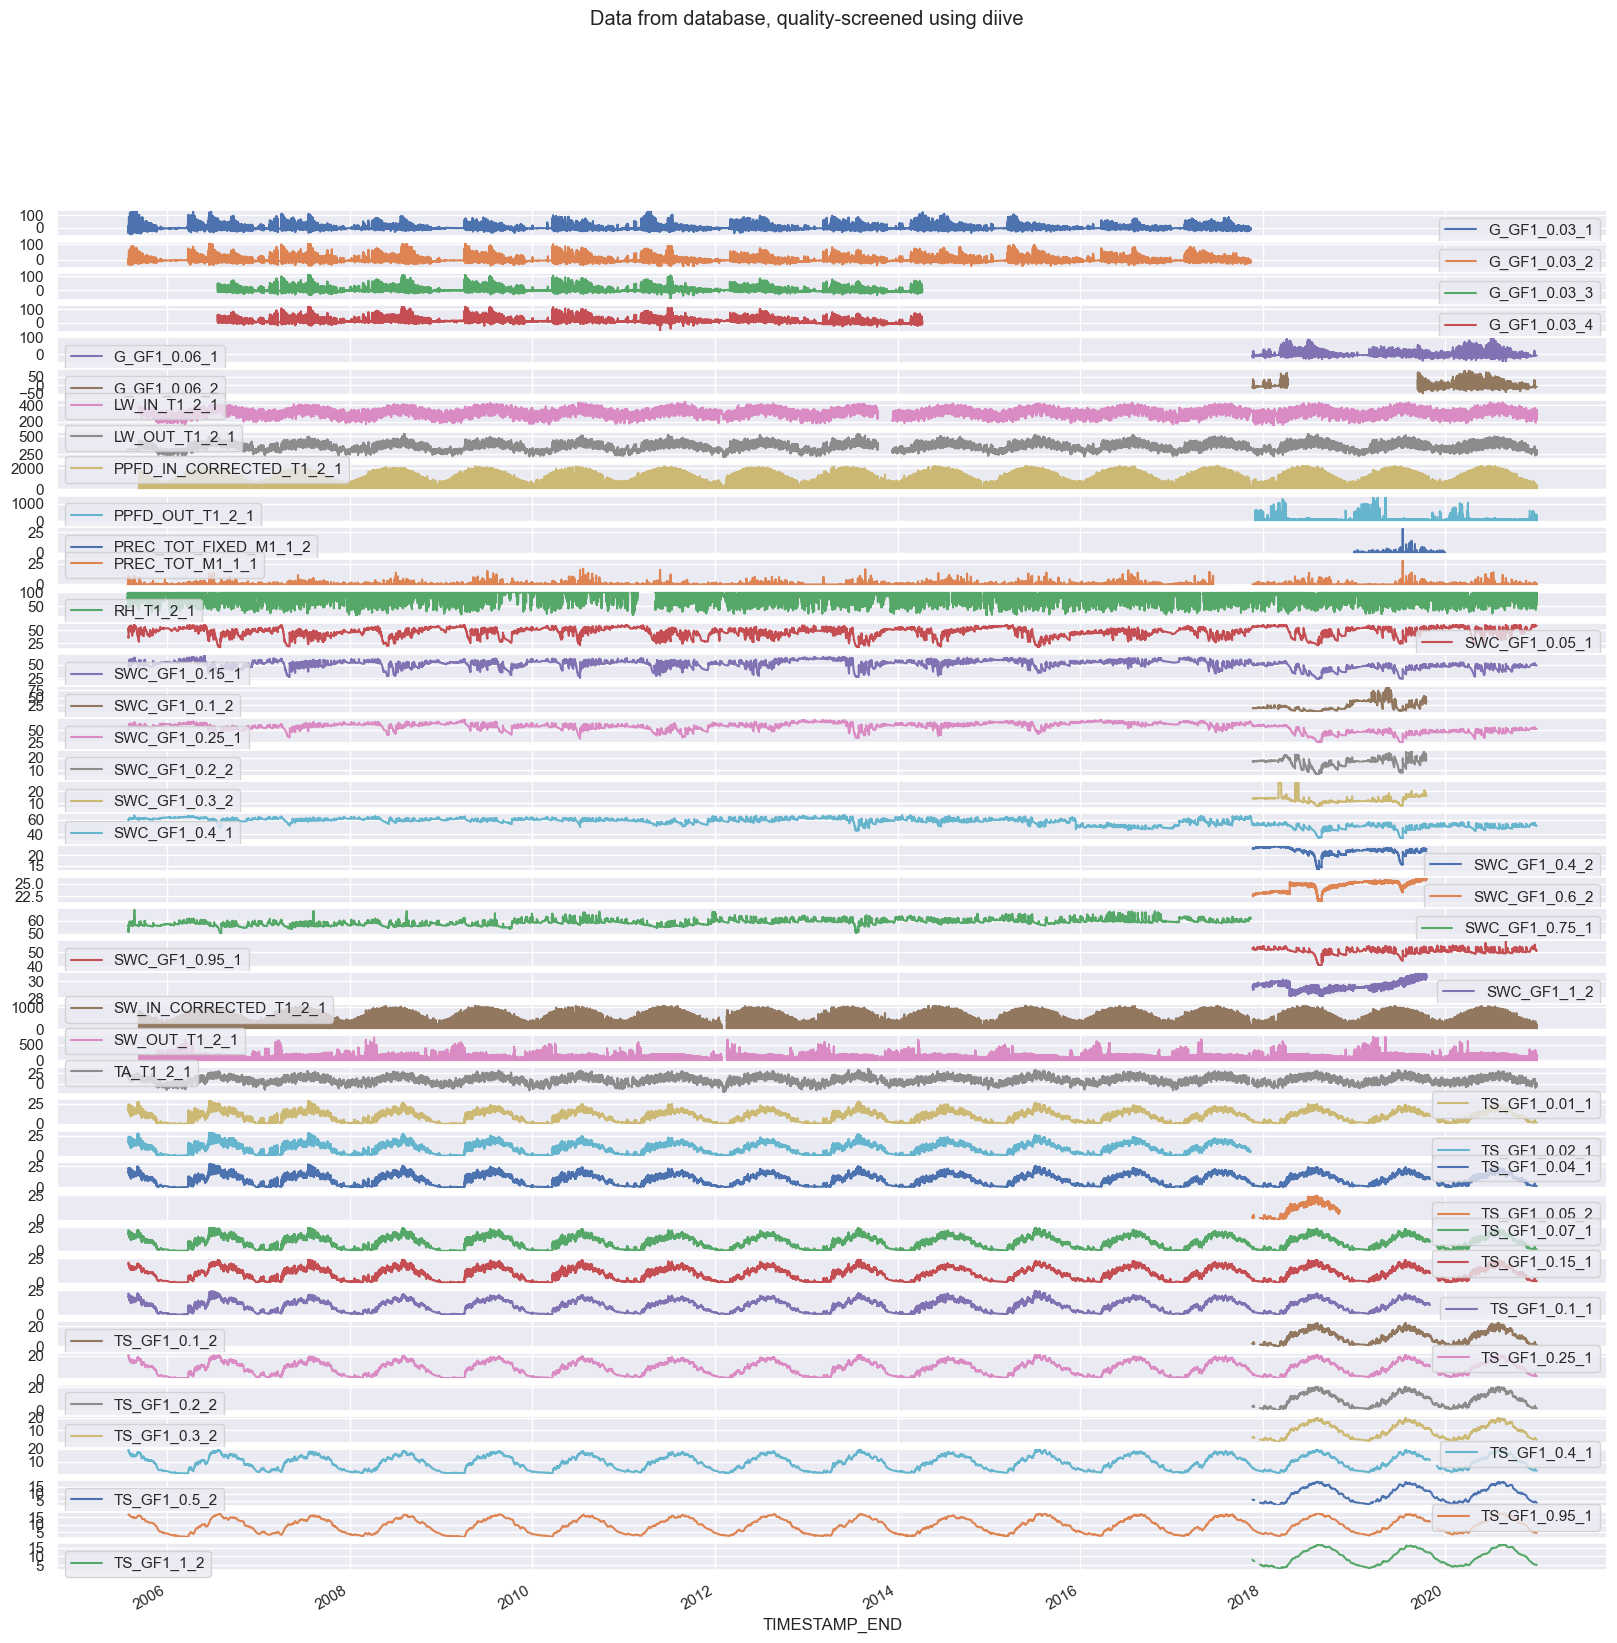

In [5]:
data_simple.plot(subplots=True, x_compat=True, title="Data from database, quality-screened using diive", figsize=(20, 20));

</br>

# **SAVE TO FILE**

In [6]:
OUTNAME = "12.3_CH-CHA_DATABASE_meteo_2005-2020"
OUTPATH = r""
filepath = save_parquet(filename=OUTNAME, data=data_simple, outpath=OUTPATH)
# data_simple.to_csv(Path(OUTPATH) / f"{OUTNAME}.csv")

Saved file 12.3_CH-CHA_DATABASE_meteo_2005-2020.parquet (0.527 seconds).


</br>

## Heatmaps

F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_base.py:208: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=self.figsize)


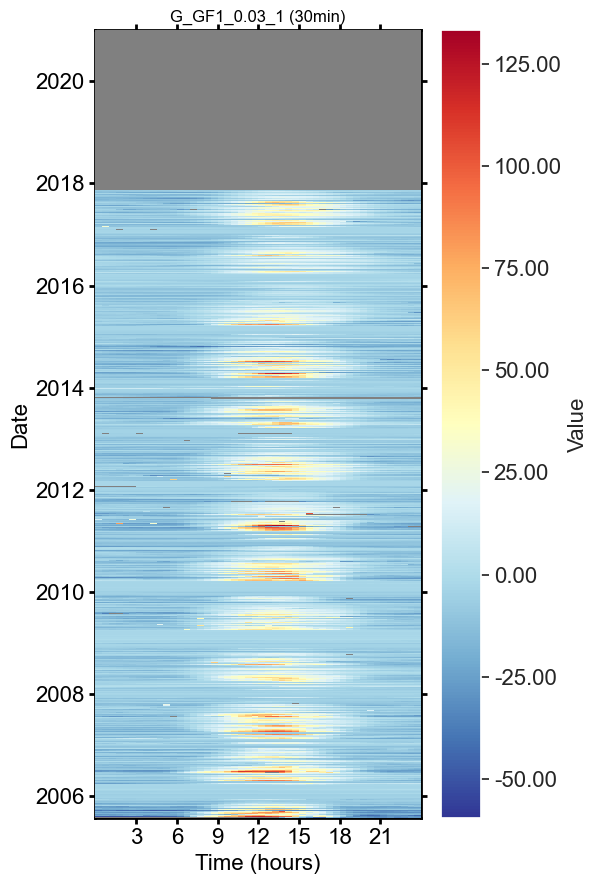

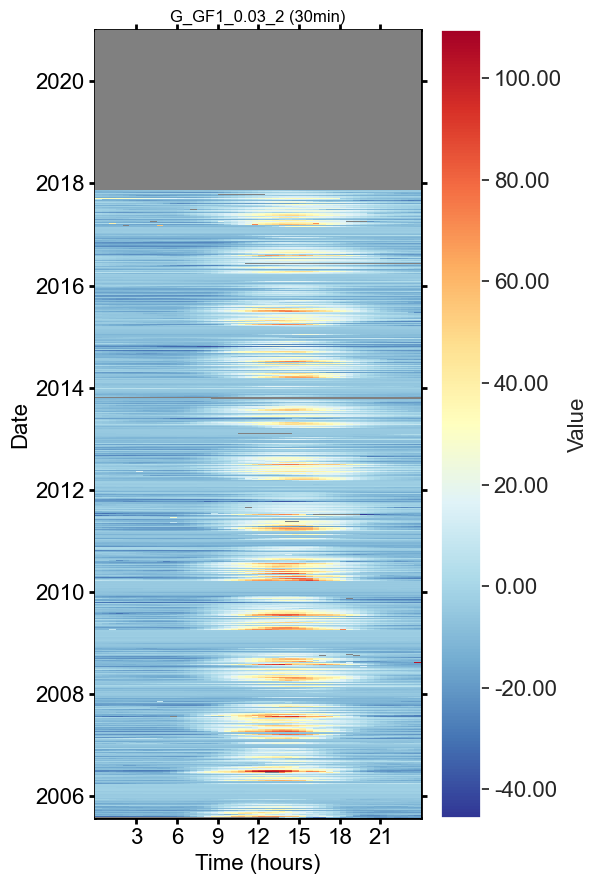

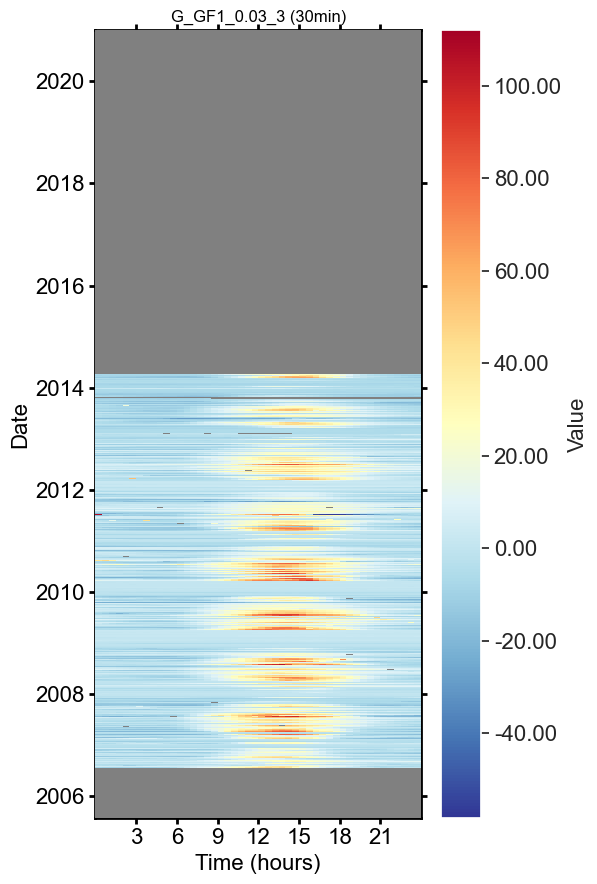

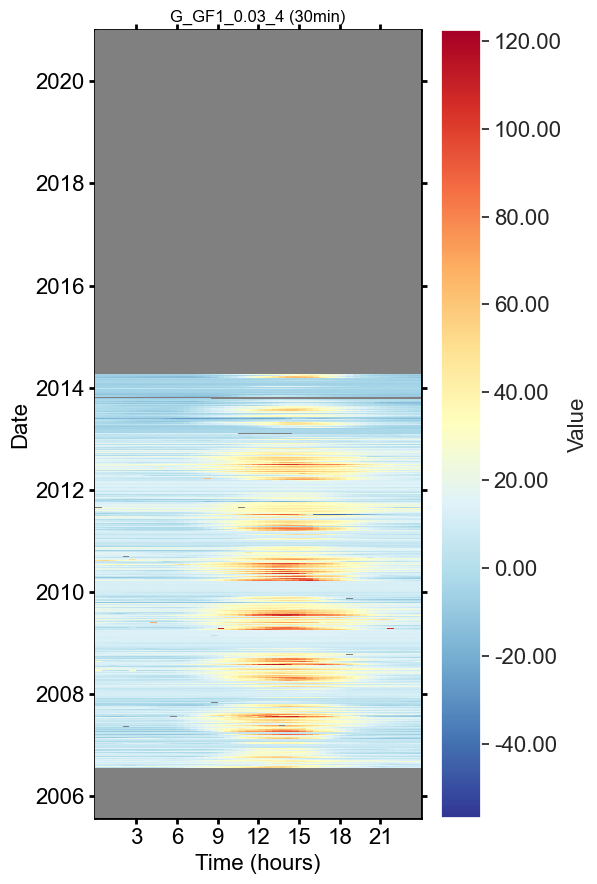

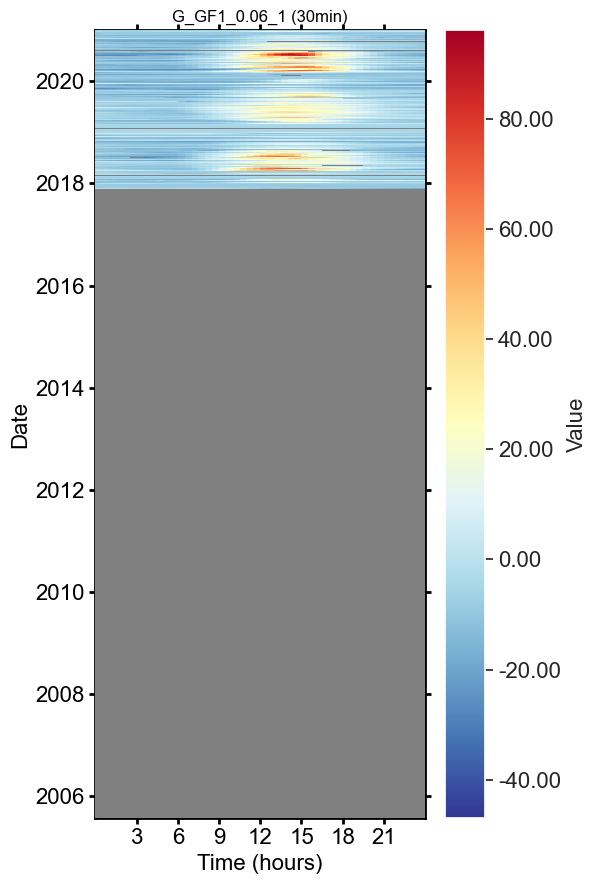

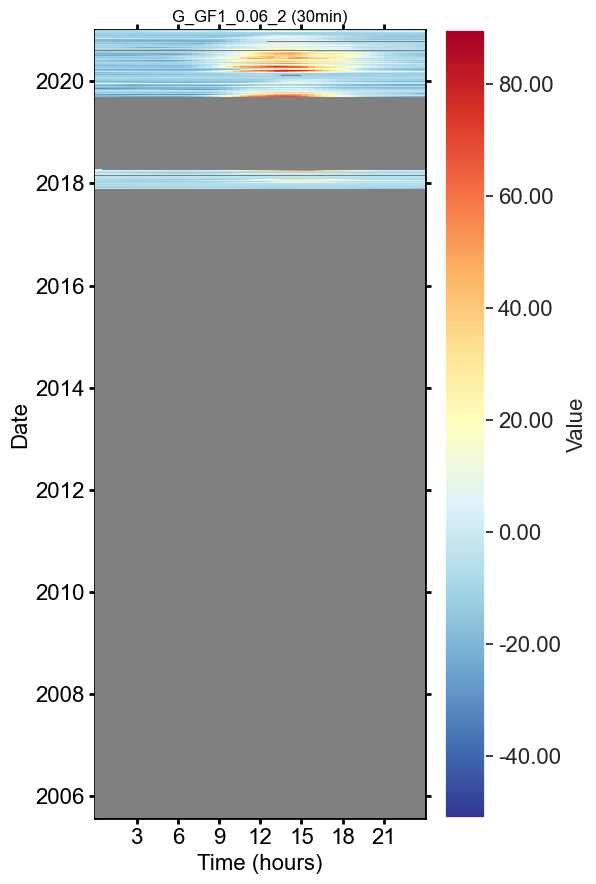

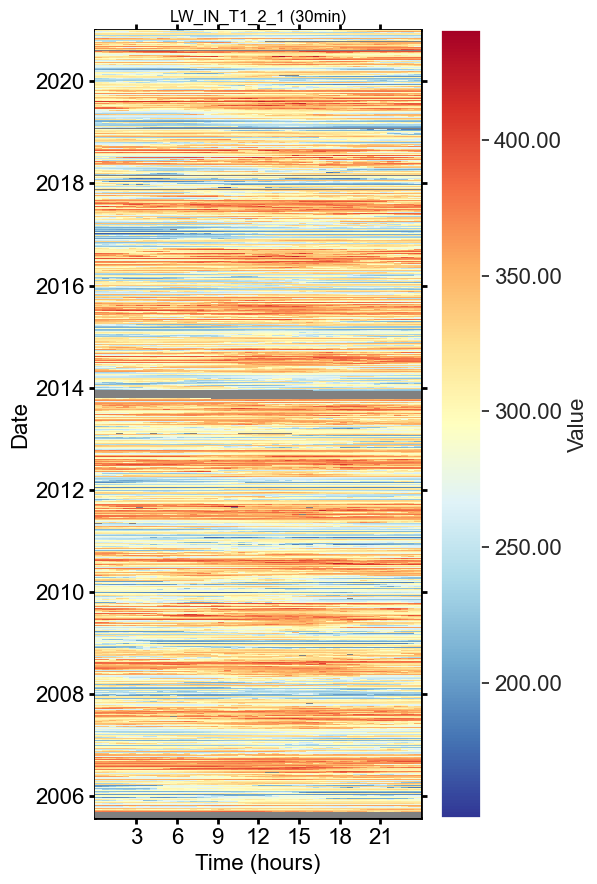

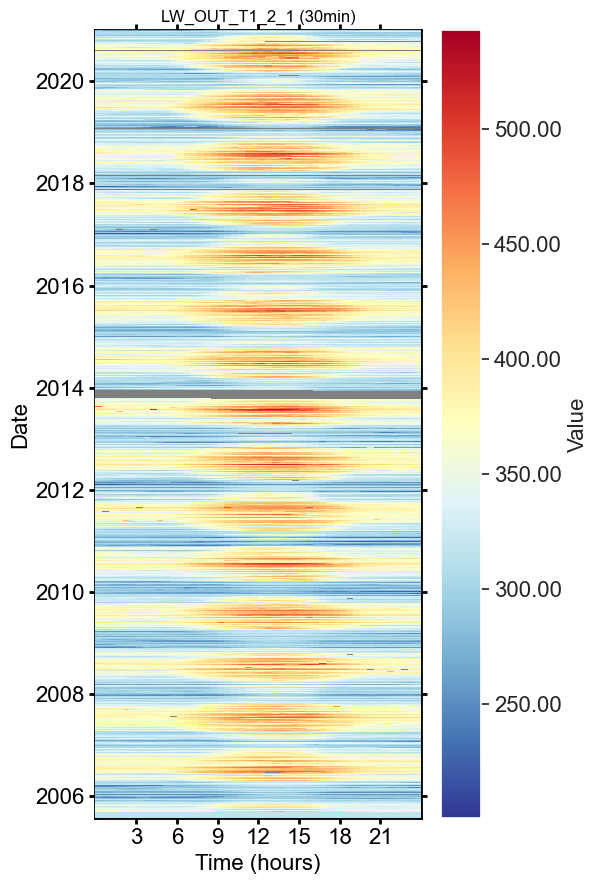

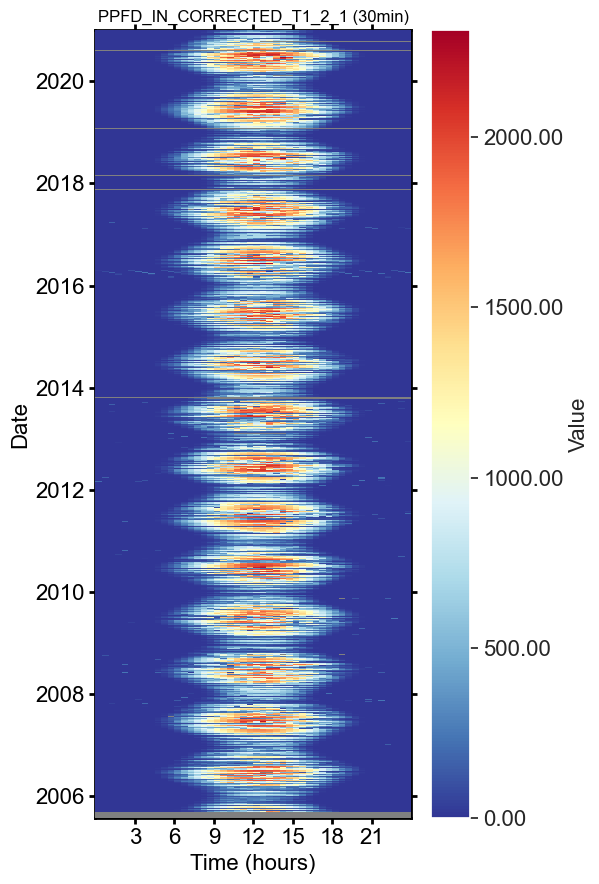

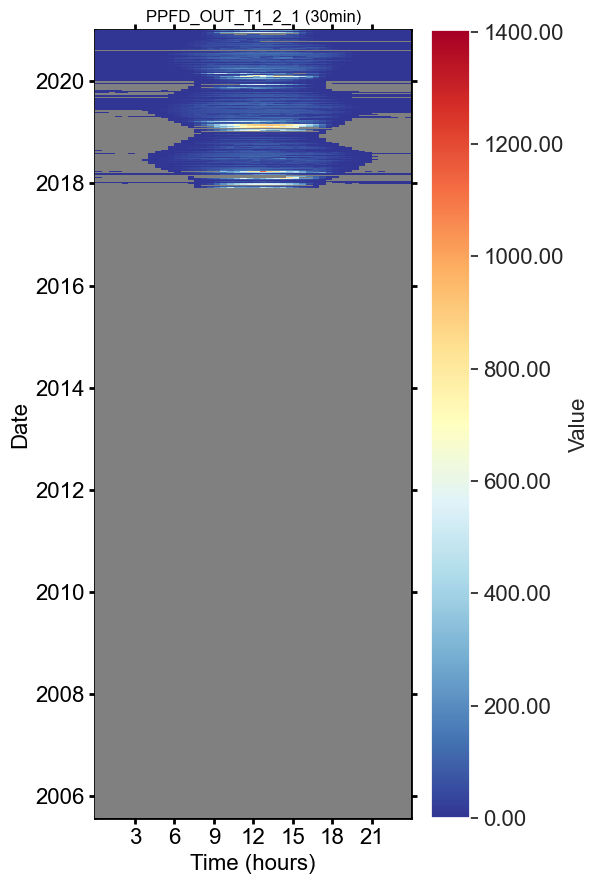

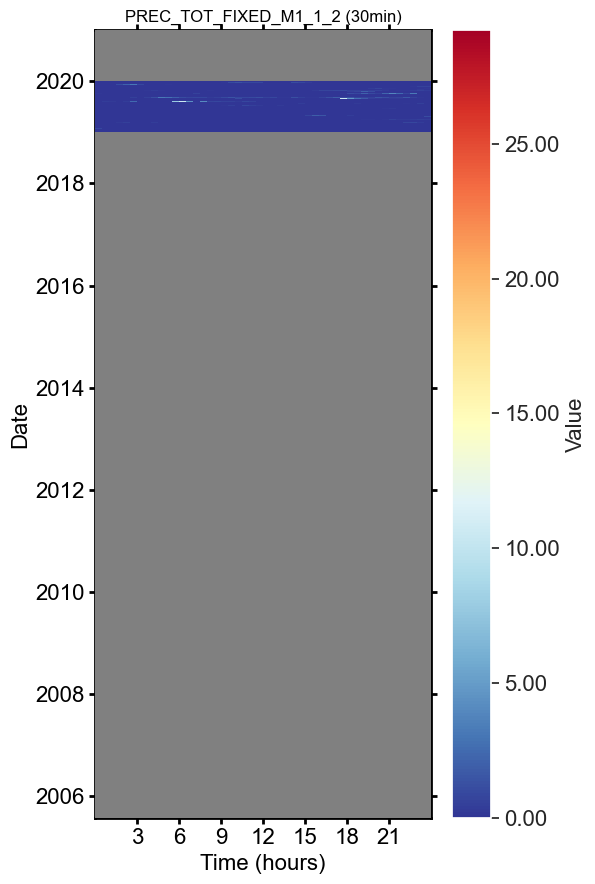

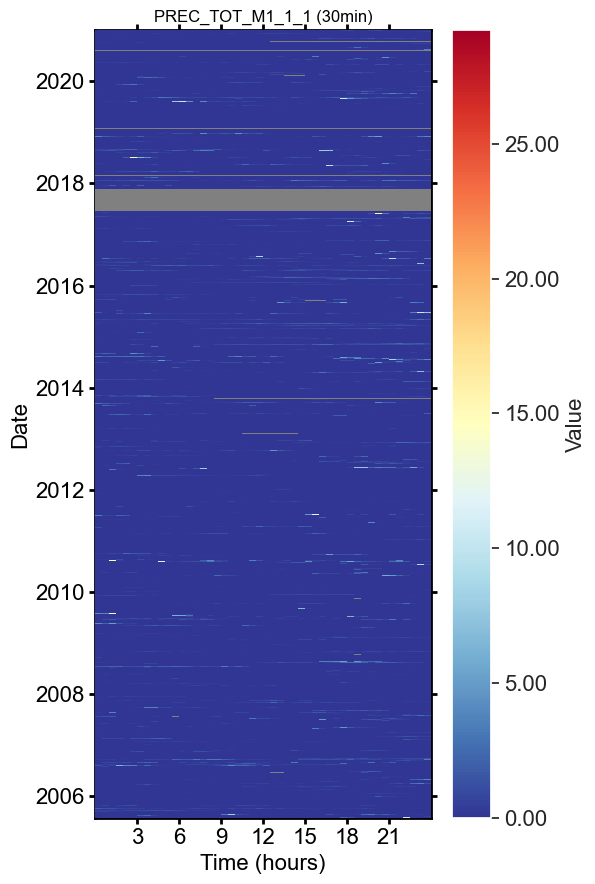

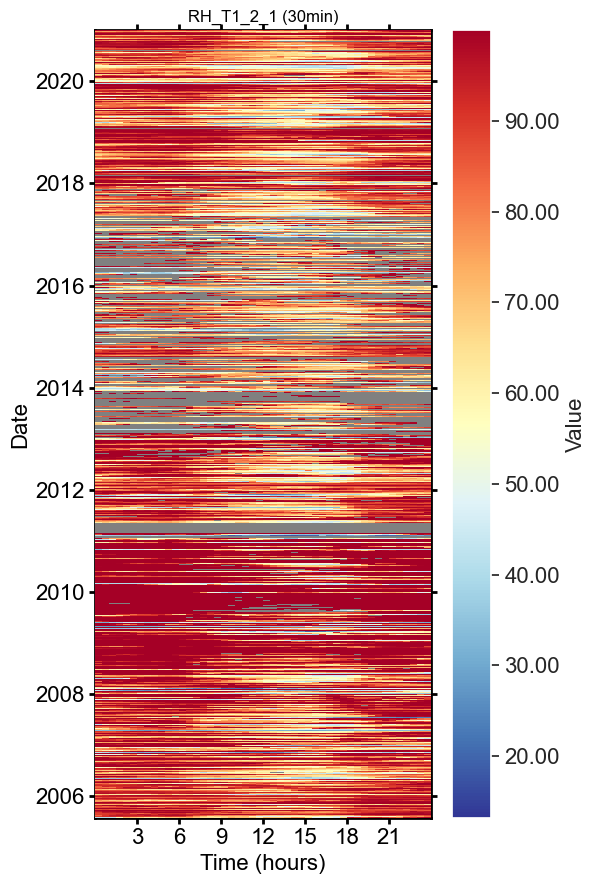

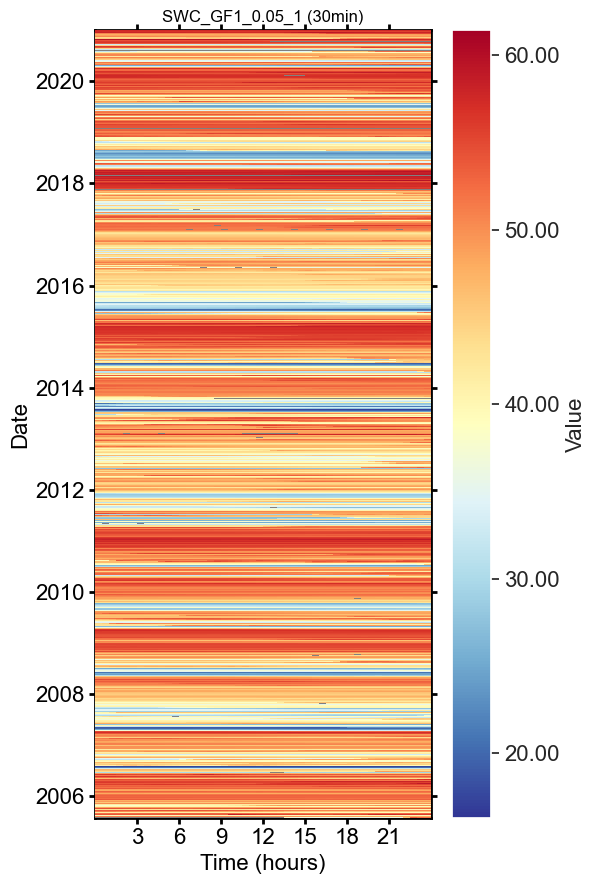

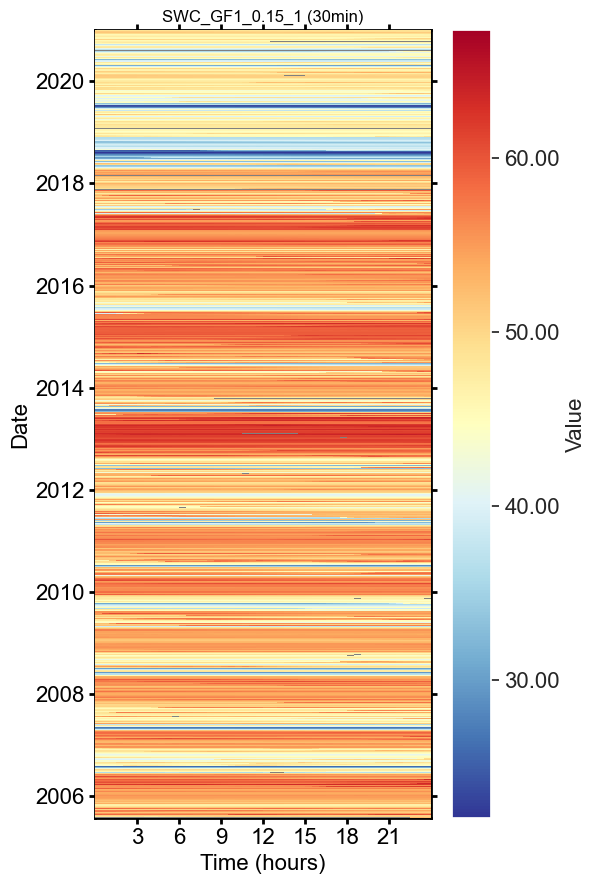

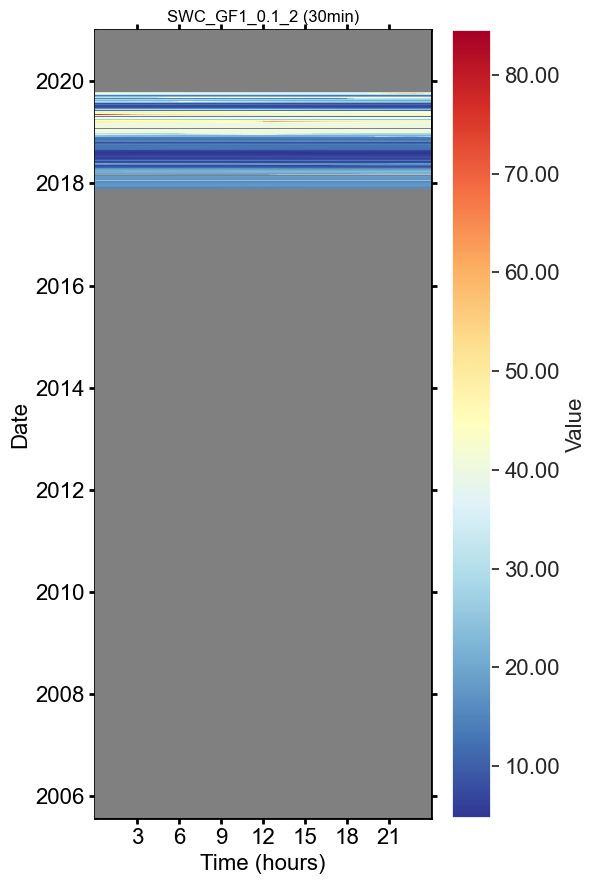

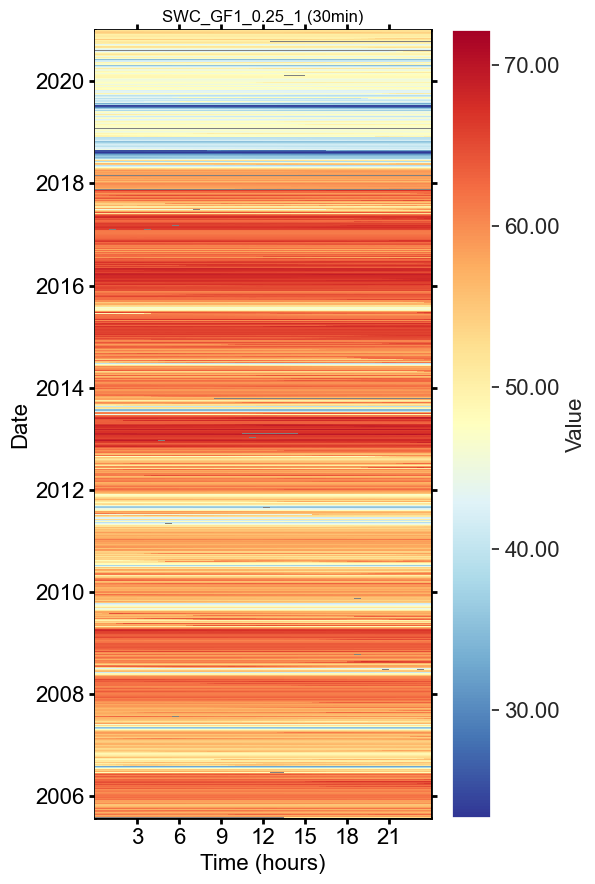

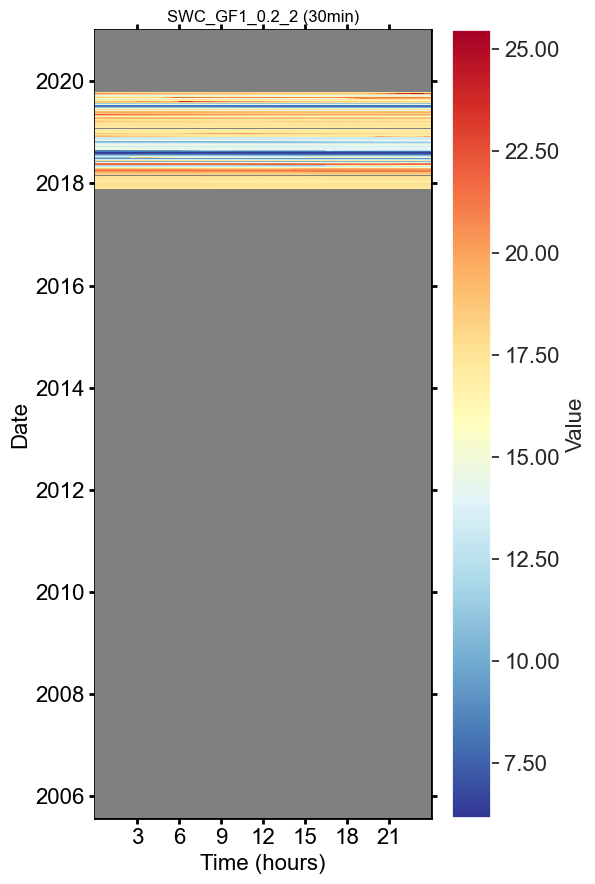

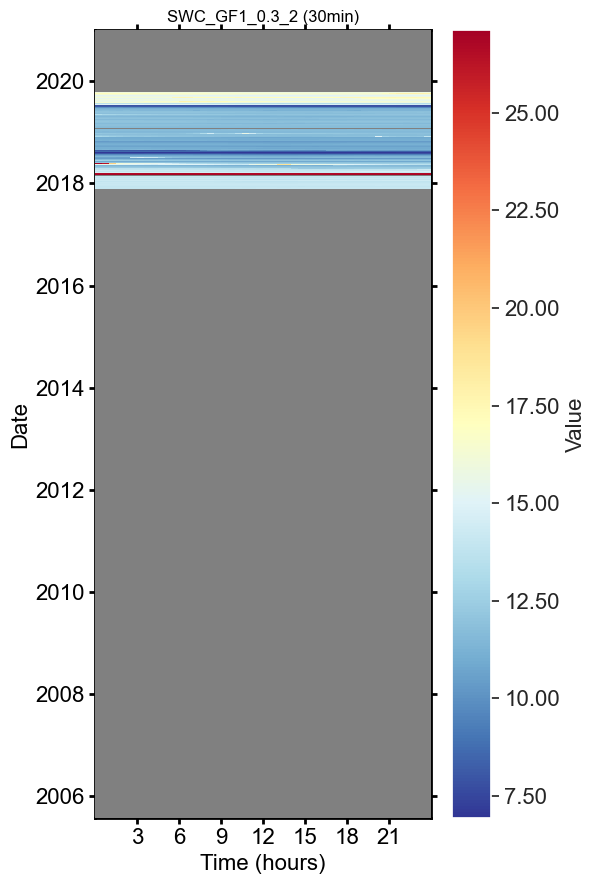

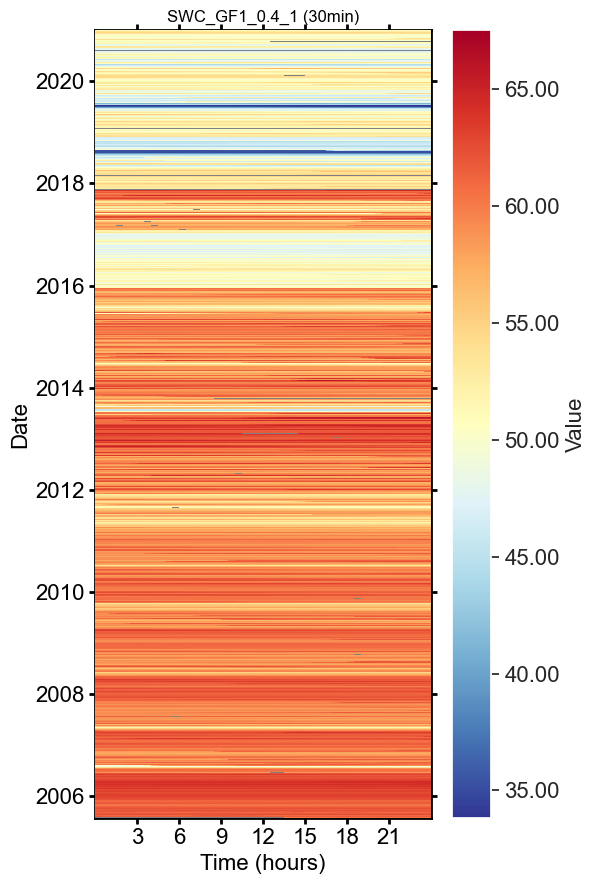

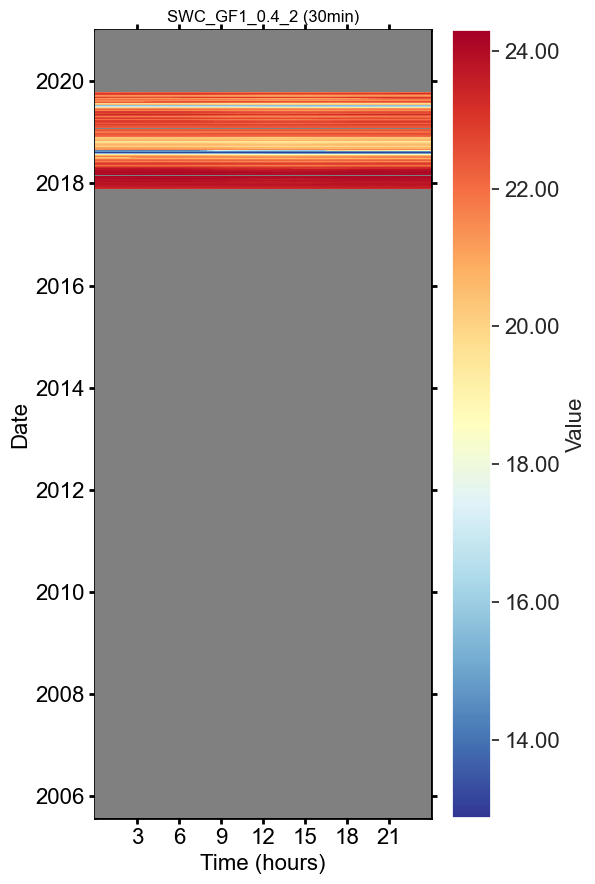

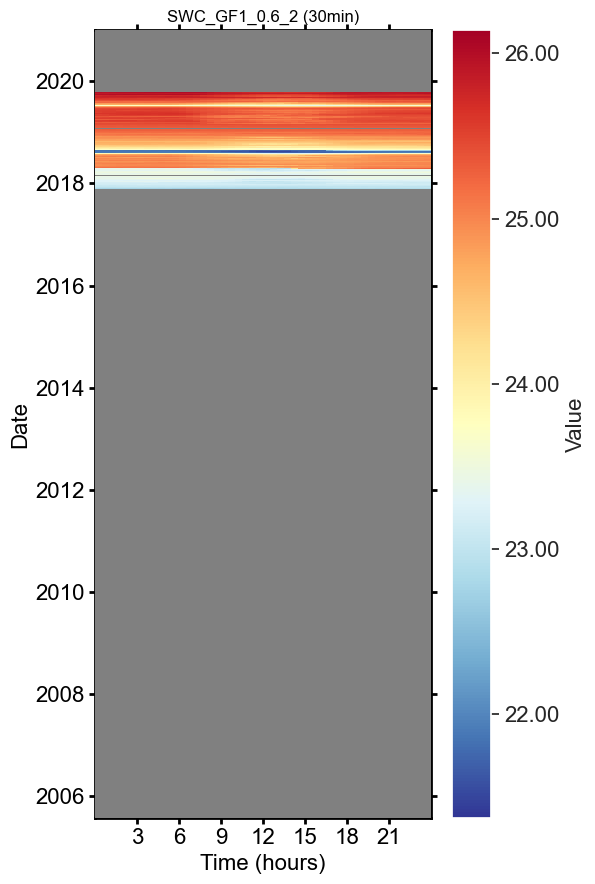

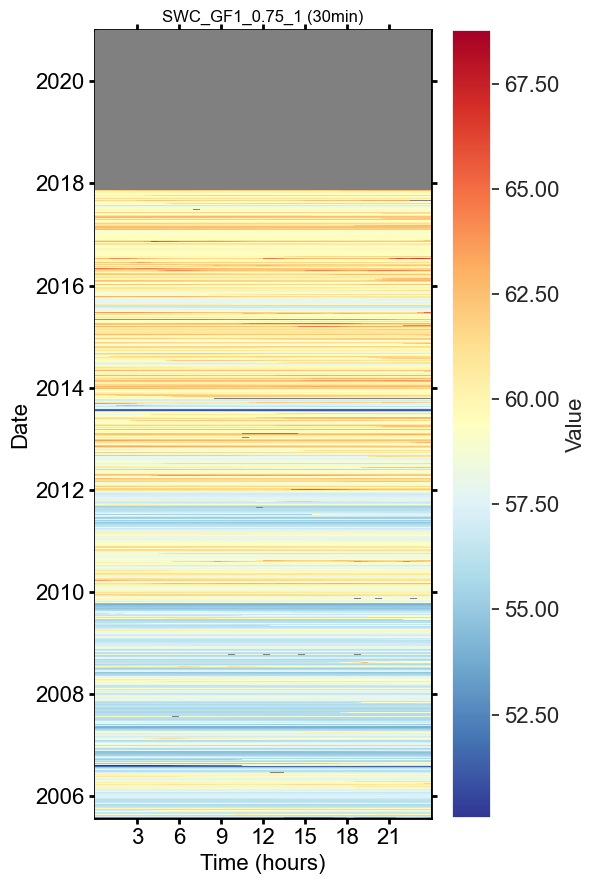

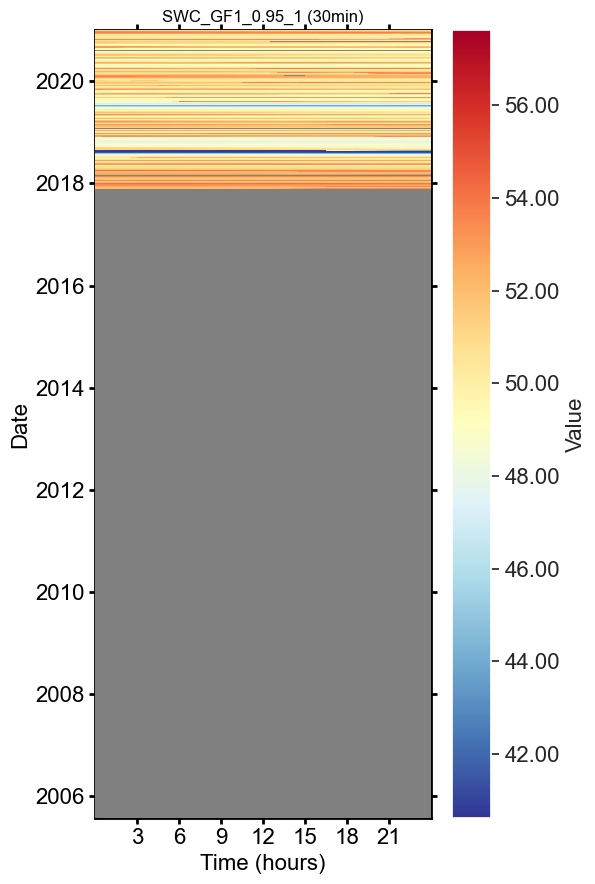

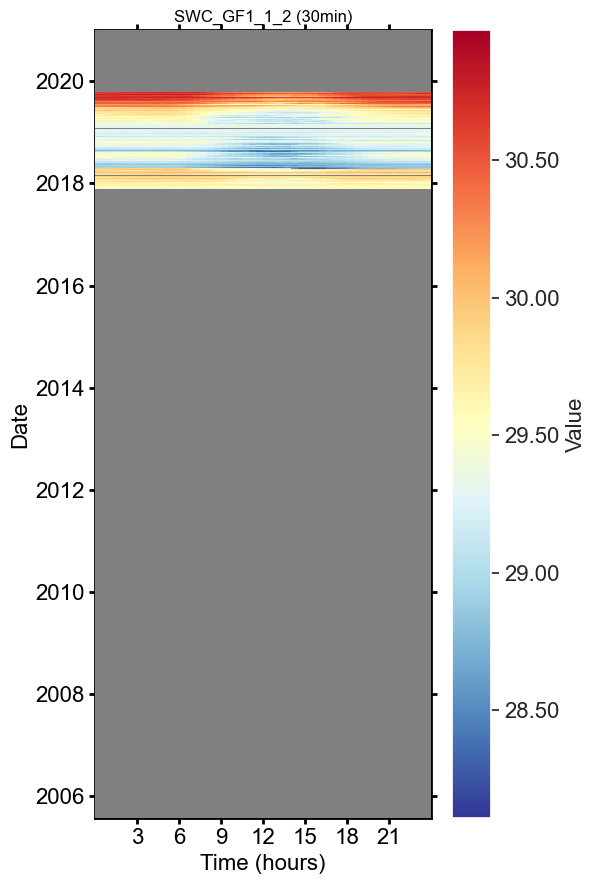

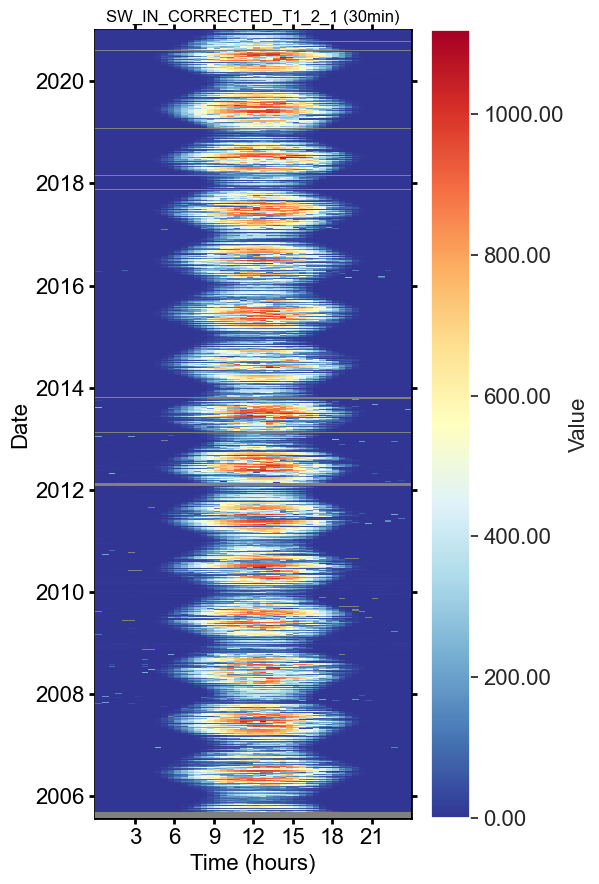

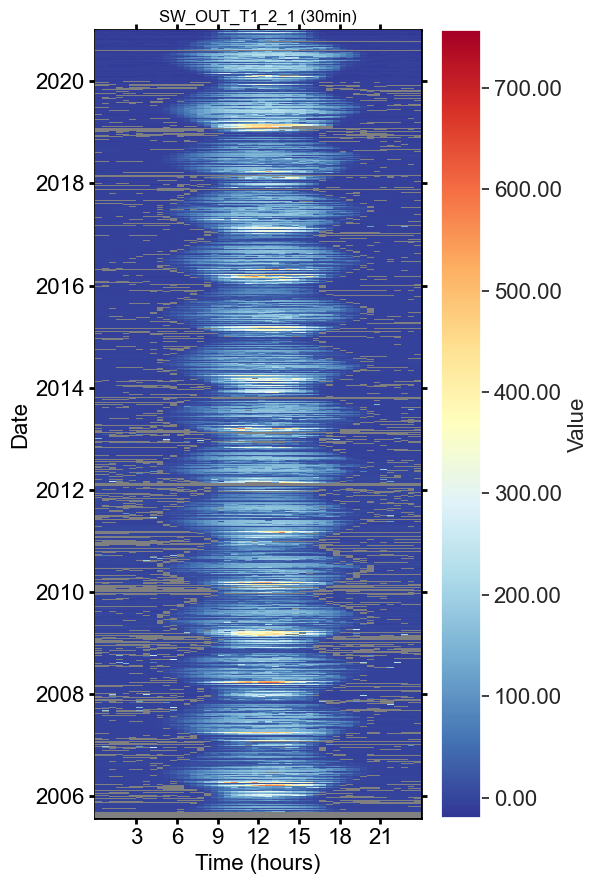

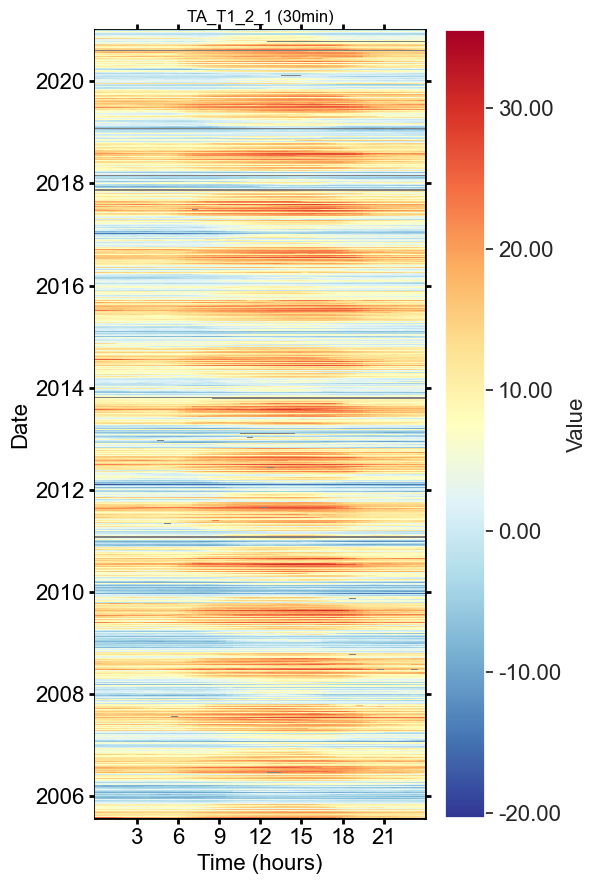

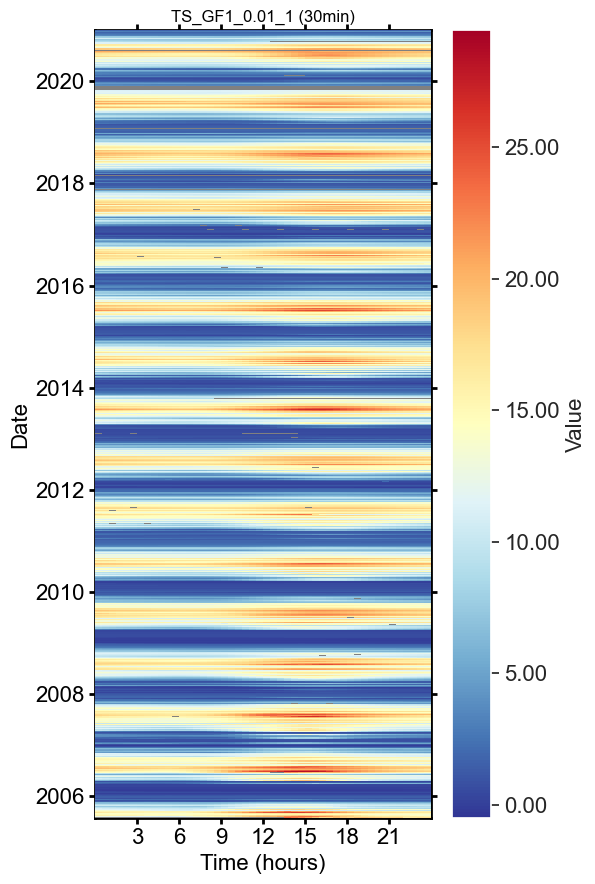

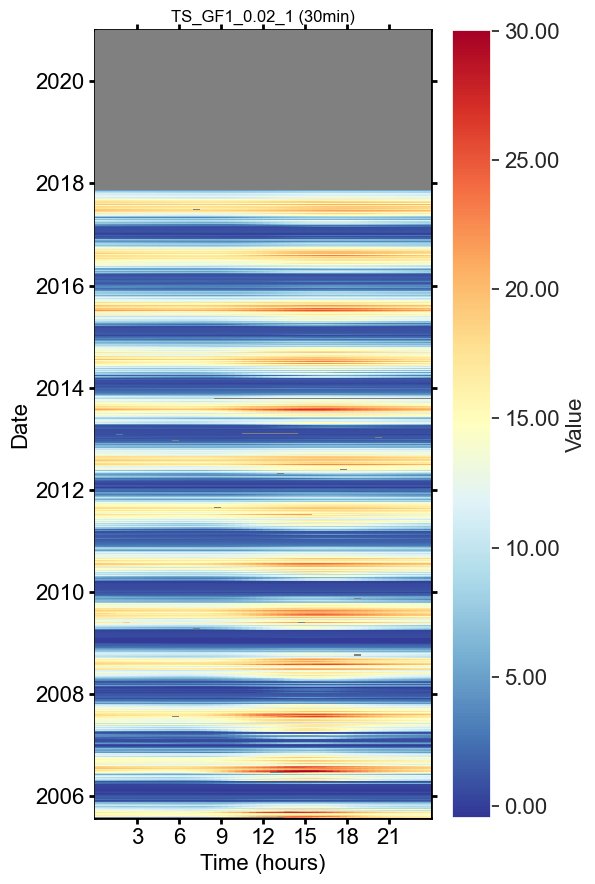

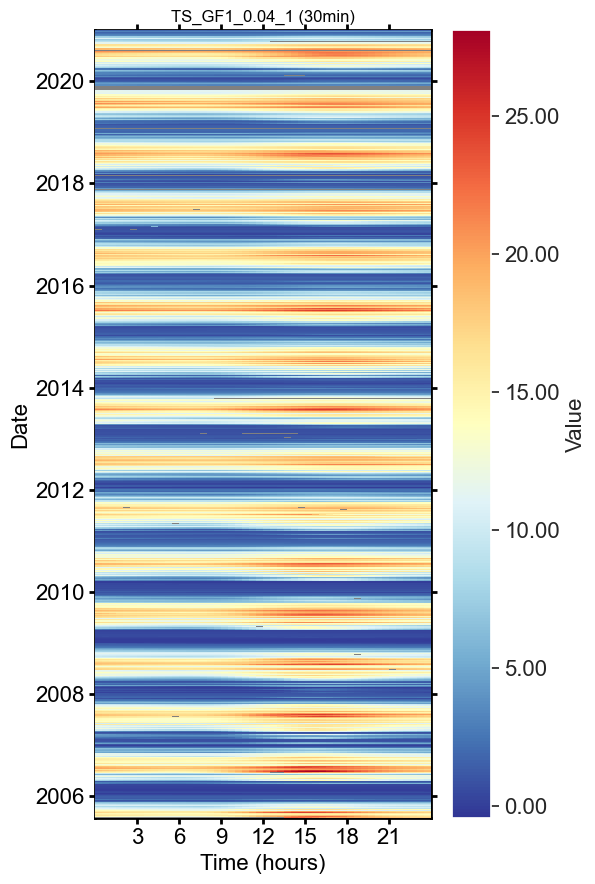

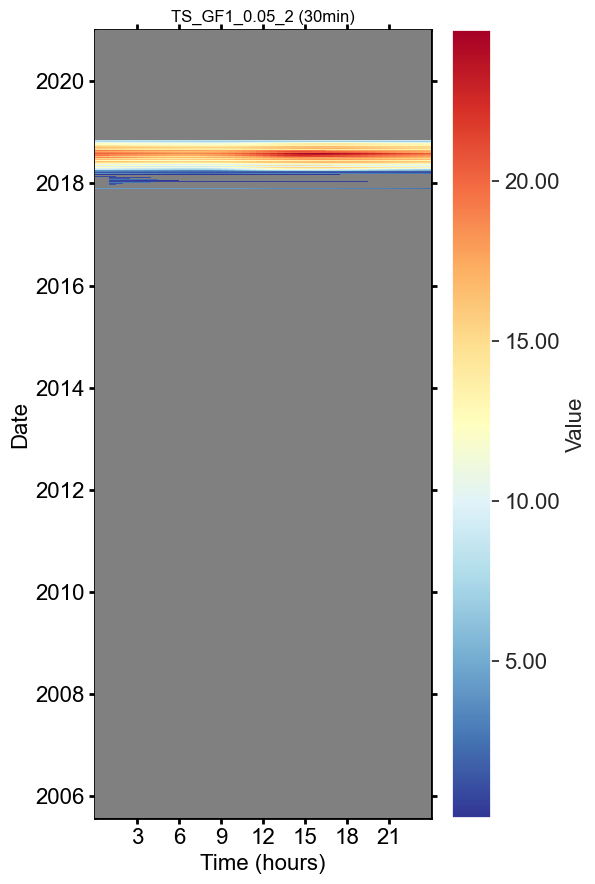

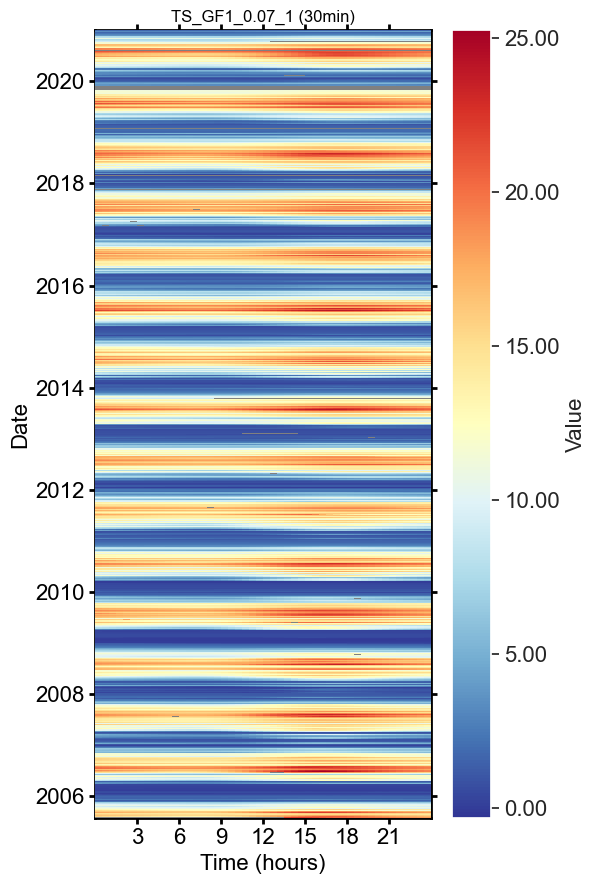

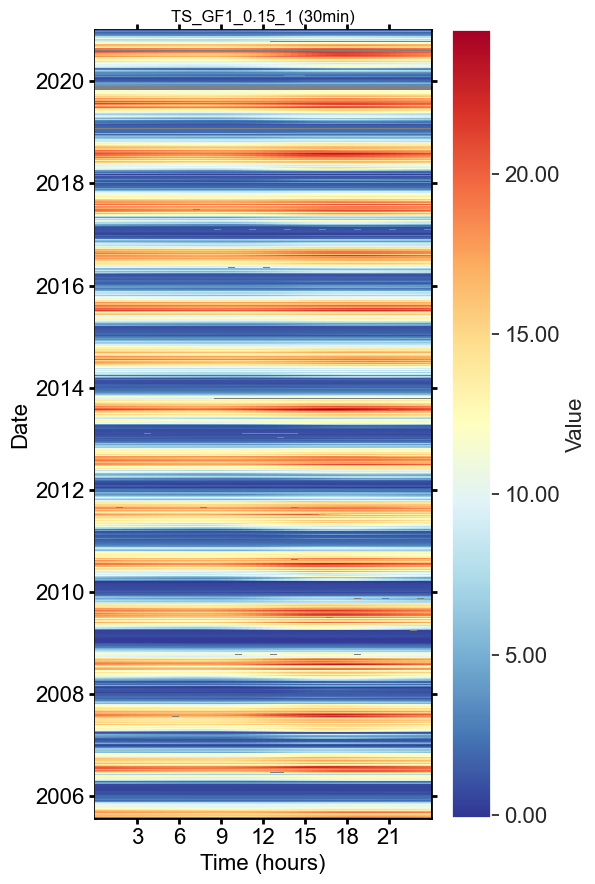

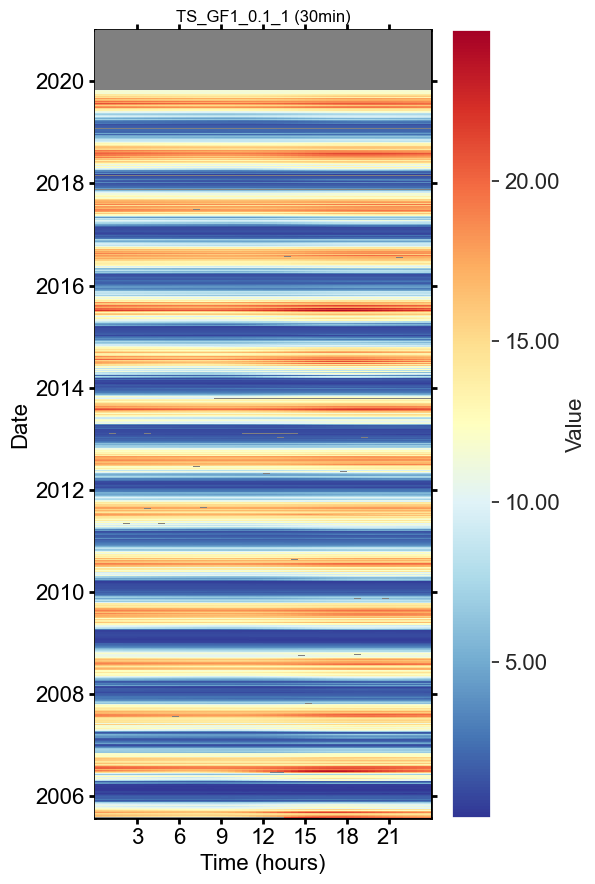

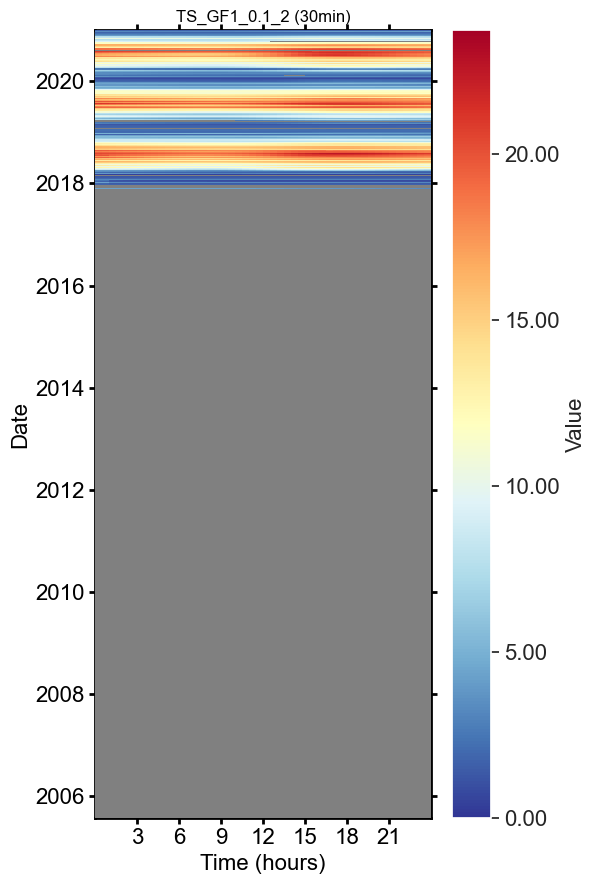

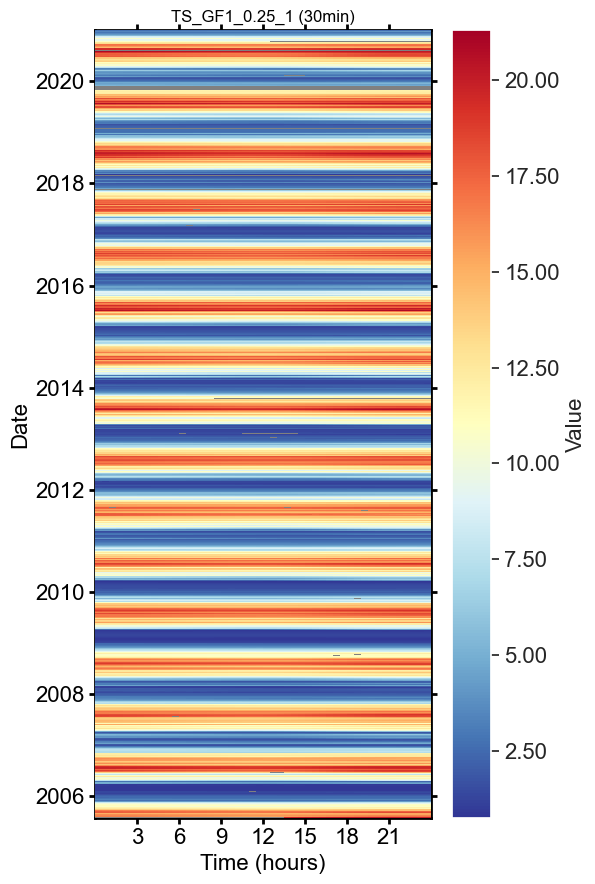

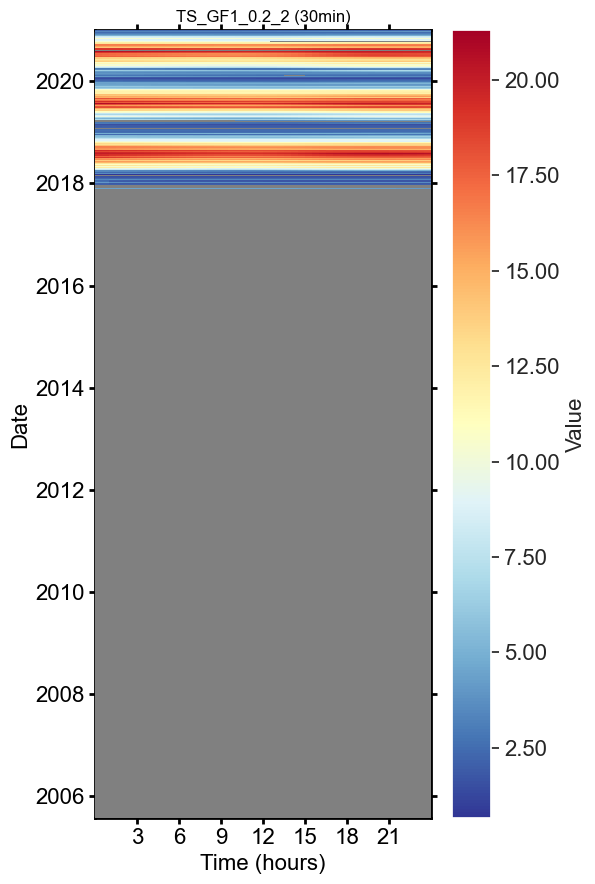

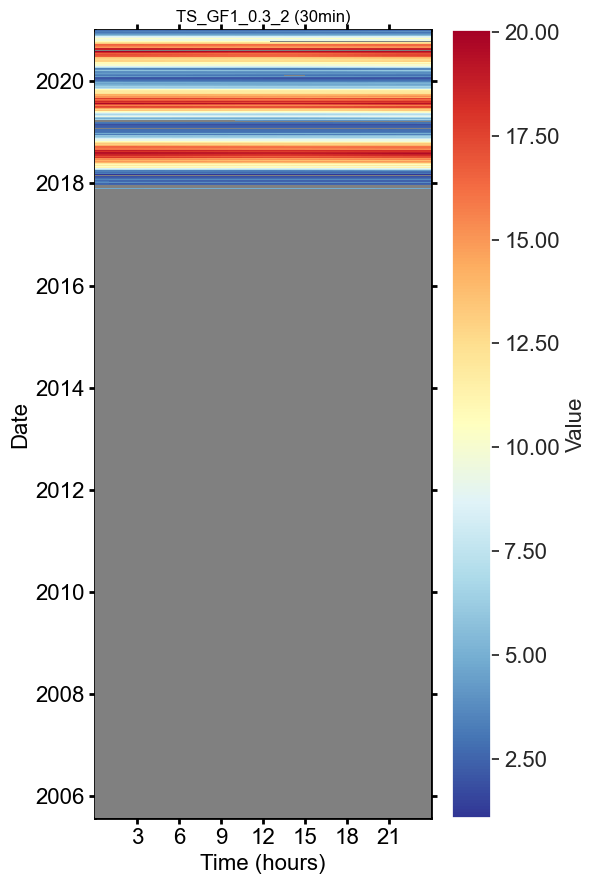

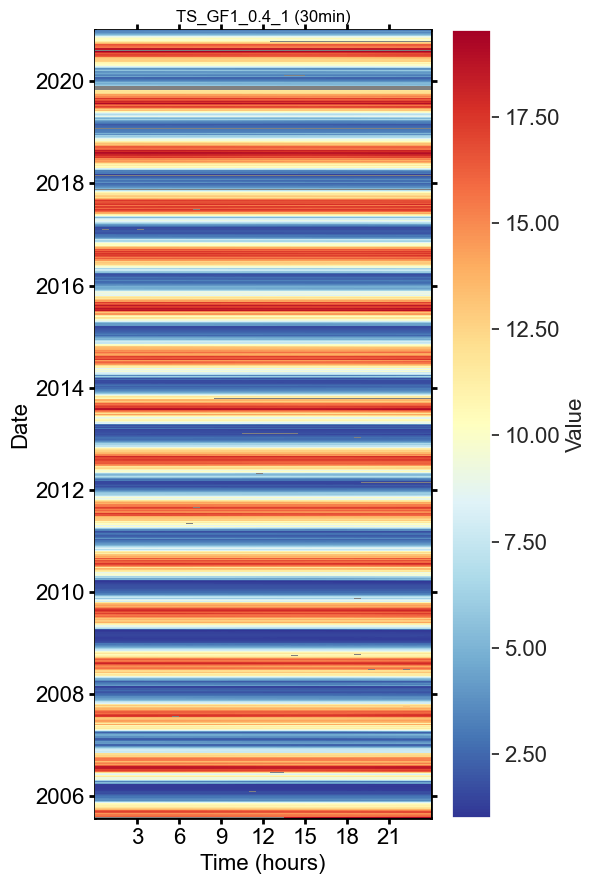

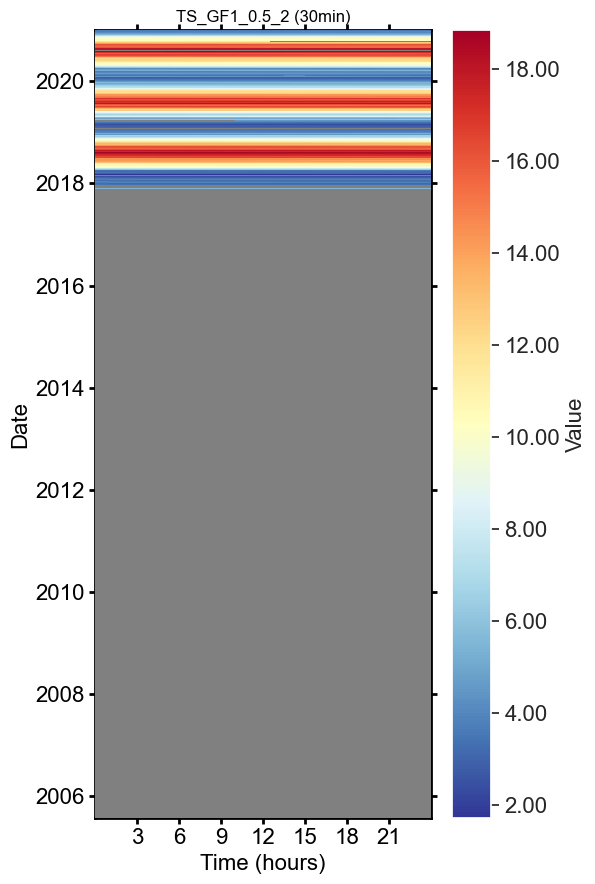

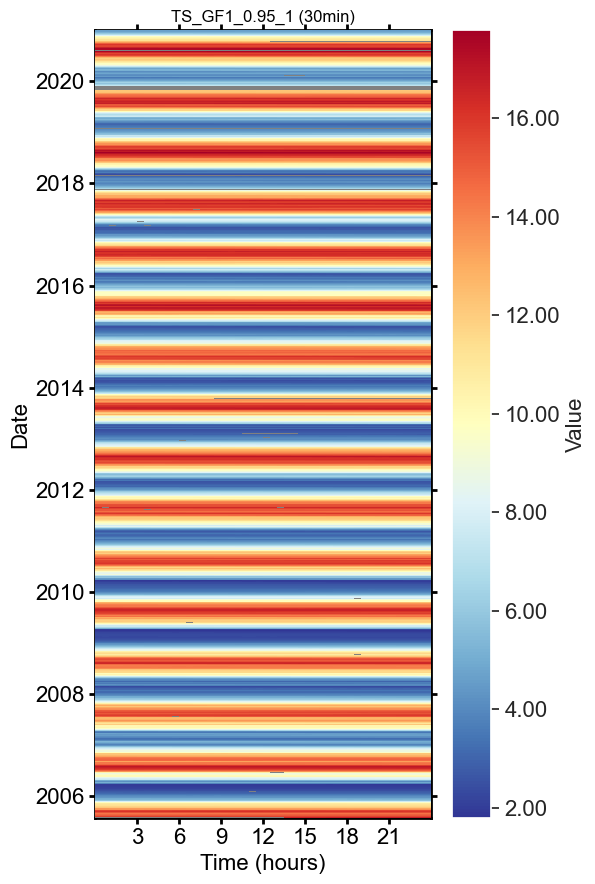

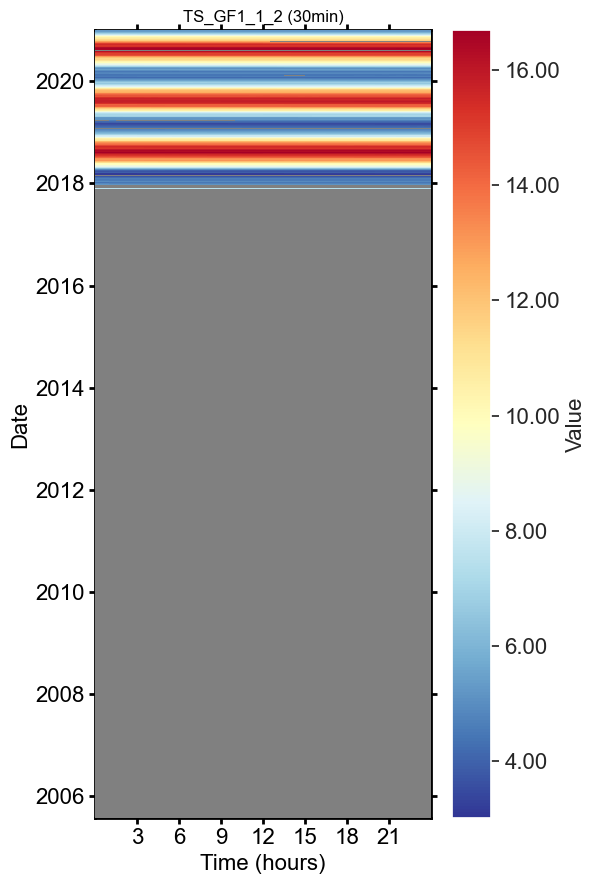

In [7]:
for col in data_simple.columns:
    series = data_simple[col]
    series.name = col
    HeatmapDateTime(series, figsize=(6, 9)).show()

</br>

# **Stats**

In [8]:
data_simple.describe()

G_GF1_0.03_1   G_GF1_0.03_2   G_GF1_0.03_3   G_GF1_0.03_4  G_GF1_0.06_1  G_GF1_0.06_2   LW_IN_T1_2_1  LW_OUT_T1_2_1  PPFD_IN_CORRECTED_T1_2_1  PPFD_OUT_T1_2_1  PREC_TOT_FIXED_M1_1_2  PREC_TOT_M1_1_1      RH_T1_2_1  SWC_GF1_0.05_1  SWC_GF1_0.15_1  ...  TS_GF1_0.01_1  TS_GF1_0.02_1  TS_GF1_0.04_1  TS_GF1_0.05_2  TS_GF1_0.07_1  TS_GF1_0.15_1   TS_GF1_0.1_1  TS_GF1_0.1_2  TS_GF1_0.25_1  TS_GF1_0.2_2  TS_GF1_0.3_2   TS_GF1_0.4_1  TS_GF1_0.5_2  TS_GF1_0.95_1    TS_GF1_1_2
count  214688.000000  214831.000000  134509.000000  134603.000000  53507.000000  28876.000000  263971.000000  266174.000000             266483.000000     39804.000000           17520.000000    261688.000000  229677.000000   268706.000000   268705.000000  ...  267314.000000  215184.000000  267361.000000   12709.000000  267339.000000  267324.000000  248477.000000  52003.000000  267336.000000  51983.000000  51983.000000  267331.000000  51982.000000  267343.000000  52349.000000
mean       -1.065637      -1.298952       3.680958      14.682020     -1.467125     -3.403707     305.302312     348.679957                287.959175        48.433714               0.097190         0.077163      81.558884       45.535724       50.494685  ...       8.953051       8.941067       9.005985      12.168708       8.974776       9.115954       9.068631      9.535410       9.256964      9.606885      9.654520       9.195649      9.732537       9.304139      9.707271
std        15.765456      14.460946      14.804661      16.214384     14.303807     15.583943      45.654226      46.851943                479.450133       115.110517               0.516939         0.433529      18.783388        8.679871        7.498336  ...       6.389183       6.451588       6.364879       6.008035       6.304719       6.221712       6.045958      6.179154       5.798481      5.870732      5.588674       5.436328      5.169586       4.751528      4.308806
min       -59.653000     -45.663000     -58.351000     -56.861000    -46.955653    -51.117857     150.205700     200.545904                  0.000000        -0.369048               0.000000         0.000000      13.164000       16.293198       22.038140  ...      -0.506450      -0.483320      -0.431490       0.097778      -0.312340      -0.092450       0.129940      0.000000       0.754220      0.666611      1.066222       0.992520      1.705862       1.795500      3.008333
25%        -9.233325      -9.216150      -5.174900       5.425550     -9.573707    -11.949795     274.666540     313.950000                  0.000397         0.000000               0.000000         0.000000      68.213000       40.828726       46.486606  ...       2.312025       2.151875       2.367800       8.578000       2.412216       2.656154       2.742674      3.297861       3.300100      3.605305      3.945028       3.661150      4.436055       4.511700      5.309556
50%        -4.417050      -4.711900       0.004520      11.806000     -5.242504     -7.388352     310.256791     344.921268                  9.501162         9.481693               0.000000         0.000000      86.813000       47.293844       52.092177  ...       9.137200       9.196200       9.244936      13.299667       9.220000       9.374027       9.366200      9.553500       9.453250      9.580778      9.671389       9.291200      9.876194       9.279600      9.627555
75%         1.527350       1.728450       7.384200      20.117500      2.483734      0.173699     338.773472     378.912793                387.418505        56.898025               0.000000         0.000000      99.827000       52.035573       55.697232  ...      14.348000      14.346000      14.411000      16.520000      14.353000      14.471000      14.307000     15.027000      14.344208     14.874361     14.811056      14.093000     14.502000      13.769000     14.029000
max       133.320000     109.460000     111.930000     122.360000     96.043967     89.662470     440.373881     542.911730               2313.619133      1402.558827          

</br>

# **End of notebook**.

In [9]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-04-21 20:12:01


</br>